# Introduction

## Background

Parkinson is a complex neurodegenerative disorder of the nervous system with moter disfunction [1]. Genome wide association studies are the major source of understanding the genetics of complex disorders [2]. GWAS Catalog is considered a gold standard in the prospect and as of July 2022, it contains ∼400 000 curated SNP-trait associations from >45 000 individual GWAS in ∼6000 publications [3]. As of Feb 2022, there are more then 40,000 studies avialble majorly focused on GWAS analytics.















## Rationale

In order to enrich the understanding of complex disorders and thier therapatic applications; there is a need for the mining of GWAS studies and thier respective Associations.

## References

1.    Poewe W, Seppi K, Tanner CM, et al. Parkinson disease. Nature reviews. Disease Primers. 2017 Mar;3:17013. DOI: 10.1038/nrdp.2017.13. PMID: 28332488. 
2.  Huang Q. Genetic study of complex diseases in the post-GWAS era. Journal of Genetics and Genomics = Yi Chuan xue bao. 2015 Mar;42(3):87-98. DOI: 10.1016/j.jgg.2015.02.001. PMID: 25819085.
3.   Sollis, E., Mosaku, A., Abid, A., Buniello, A., Cerezo, M., Gil, L., Groza, T., Güneş, O., Hall, P., Hayhurst, J., Ibrahim, A., Ji, Y., John, S., Lewis, E., MacArthur, J. A. L., McMahon, A., Osumi-Sutherland, D., Panoutsopoulou, K., Pendlington, Z., Ramachandran, S., … Harris, L. W. (2023). The NHGRI-EBI GWAS Catalog: knowledgebase and deposition resource. Nucleic acids research, 51(D1), D977–D985. https://doi.org/10.1093/nar/gkac1010


# Data Preprocessing

## Libraries Importation

In [ ]:
import os
import numpy as np
import pandas as pd
import datetime
import tensorflow as tf
import tensorflow_hub as hub

print("Version of tf: ", tf.__version__)
print("Version of pd: ", pd.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("Hub version: ", hub.__version__)
print("GPU is", "available" if tf.config.list_physical_devices("GPU") else "NOT AVAILABLE")

Version of tf:  2.11.0
Version of pd:  1.3.5
Eager mode:  True
Hub version:  0.12.0
GPU is NOT AVAILABLE


## Data Importation

In [ ]:
dataset_raw = pd.read_csv('/content/sample_data/data_ml_gwas_titles.csv')
print(dataset_raw)

                                               *title*  *label*
0    *"A generalized linear mixed model association...        1
1    *"Genetics of early-onset Parkinson's disease ...        1
2    *"Identification of Risk Loci for Parkinson Di...        1
3    *"Genetic modifiers of risk and age at onset i...        1
4                 *"Identification of novel risk loci*        1
..                                                 ...      ...
109  *"Research progress of stem cell therapy for e...        0
110  *"Human metabolite detection by surface-enhanc...        0
111  *"Biohybrid materials: Structure design and bi...        0
112  *"3D-bioprinted peptide coupling patches for w...        0
113  *"Preparation and application of calcium phosp...        0

[114 rows x 2 columns]


The imported semi-processed dataset from a csv file contains the data of 114 research studies. The imported studies are of two types GWAS-Parkinson Studies and non GWAS-Parkinson studies; with label 1 reperesents the GWAS-Parkinson Studies and 0 represent the non GWAS-Parkinson studies.

## EDA

In [ ]:
dataset_raw.dtypes

*title*    object
*label*     int64
dtype: object

Titles of the studies are in object datatype; requiring a NLP based feature formation procedures.


---



In [ ]:
dataset_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   *title*  114 non-null    object
 1   *label*  114 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 1.9+ KB


The preproceesed imported dataset contain no null or missing values in both the coloums; hence a skiping of data cleaning procedures.


---



<AxesSubplot:>

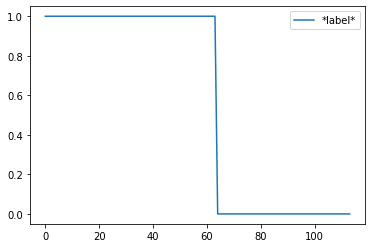

In [ ]:
dataset_raw.plot()

The distribution of both GWAS-Parkinson studies and non GWAS-Parkinson studies is almost equally divided, giving a good starting point against baised dataset problems.


---



## Feature Transformation

In [ ]:
features = dataset_raw.iloc[:, :-1]; features

,*title*
0,"*""A generalized linear mixed model association..."
1,"*""Genetics of early-onset Parkinson's disease ..."
2,"*""Identification of Risk Loci for Parkinson Di..."
3,"*""Genetic modifiers of risk and age at onset i..."
4,"*""Identification of novel risk loci*"
...,...
109,"*""Research progress of stem cell therapy for e..."
110,"*""Human metabolite detection by surface-enhanc..."
111,"*""Biohybrid materials: Structure design and bi..."
112,"*""3D-bioprinted peptide coupling patches for w..."


Numpy is utilized to extract the features from the dataset and saved into a numpy array.


---



In [ ]:
labels = dataset_raw.iloc[:,-1:]; labels

,*label*
0,1
1,1
2,1
3,1
4,1
...,...
109,0
110,0
111,0
112,0


Numpy is utilized to extract the labels from the dataset and saved into a numpy array.


---



In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.33, random_state=50)

Numpy array of both the features and labels is transformed into a four different numpy arrays; reperesenting train data (66%) and test data (33%).


---



In [ ]:
X_train = tf.convert_to_tensor(X_train)
X_test = tf.convert_to_tensor(X_test)
y_train = tf.convert_to_tensor(y_train)
y_test = tf.convert_to_tensor(y_test)

The numpy arrays of both the training and testing dataset are transformed into an tensor datatype.


---



# Modeling

## Architecture Declaration

In [ ]:
embedding = "https://tfhub.dev/google/nnlm-en-dim50/2"
hub_layer = hub.KerasLayer(embedding, input_shape=[], 
                           dtype=tf.string, trainable=True)

The embedding layer is defined based on nnlm-em-dim50/2 languge model trained on the english languge google news dataset.


---



In [ ]:
model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1))

model.summary()

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 50)                48190600  
                                                                 
 dense (Dense)               (None, 16)                816       
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 48,191,433
Trainable params: 48,191,433
Non-trainable params: 0
_________________________________________________________________


## Architecture Compilation

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Model Fitting

In [ ]:
history = model.fit(X_train, y_train, epochs=20, batch_size=20)

Epoch 1/20
4/4 [==============================] - 4s 765ms/step - loss: 0.6574 - accuracy: 0.4605
Epoch 2/20
4/4 [==============================] - 2s 562ms/step - loss: 0.6215 - accuracy: 0.4868
Epoch 3/20
4/4 [==============================] - 2s 583ms/step - loss: 0.5915 - accuracy: 0.5789
Epoch 4/20
4/4 [==============================] - 2s 575ms/step - loss: 0.5621 - accuracy: 0.6316
Epoch 5/20
4/4 [==============================] - 2s 585ms/step - loss: 0.5329 - accuracy: 0.6842
Epoch 6/20
4/4 [==============================] - 3s 707ms/step - loss: 0.5045 - accuracy: 0.7763
Epoch 7/20
4/4 [==============================] - 2s 575ms/step - loss: 0.4763 - accuracy: 0.8421
Epoch 8/20
4/4 [==============================] - 2s 561ms/step - loss: 0.4479 - accuracy: 0.9605
Epoch 9/20
4/4 [==============================] - 2s 585ms/step - loss: 0.4198 - accuracy: 0.9868
Epoch 10/20
4/4 [==============================] - 2s 608ms/step - loss: 0.3913 - accuracy: 1.0000
Epoch 11/20
4/4 [==

# Evaluation and Optimization

In [ ]:
results = model.evaluate(X_test, y_test, verbose=2)

for name, value in zip(model.metrics_names, results):
  print("%s: %.3f" % (name, value))

2/2 - 0s - loss: 0.2913 - accuracy: 0.9474 - 456ms/epoch - 228ms/step
loss: 0.291
accuracy: 0.947


The build model achieved 94% accuracy to predict the GWAS-Parkinson studies.


---



# Implications
The build deep learning model will assist in the mass screening of new research studies in the domain of genome wide associations in Parkinson. The screen studies would contain the dataset of GWAS Associations that might not be previouslly annotated in the current databases. This approch will provide an oppertunity to have the hands on new associations to build and update the current **`biomarker and drug target identification hypothesis`** to putforth the personalized medicine.

Some of the potential applications and implication of the current study includes:


1.   Build / update biomarker hypothesis
2.   Build / update drug target identification hypothesis.
3.   Better understand disease biology.








---


> `I am a Bioinformatics and Machine learning expert; mostly working around genomics, drug development and medicine.`
~ Ahsan Raza
aysanraza@gmail.com 
[Linkedin](https://www.linkedin.com/in/ahsan-raza-0510b1128/)

---





